# Assignment 11: Word Vectors using Truncated SVD [M]

Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.Here,  Word Vectors using Truncated SVD is applied on amazon reviews datasets .From Different Types of word embedding ,here frequency based (TF_IDF word 2vec techniques ) is used. 


Procedure to execute the above task is as follows:

##### Procedure:


* **Step1: Take Reviews data of amazon reviews data-set. And Ignore polarity column**


* **Step2: To get Important Features using TF_IDF.**


* **Step3: To calculate Co-occurance Matrix with Selected Important Features** 
  
  
* **Step4: To choose the n_components in truncated svd, with maximum explained variance and plotting of cumulative explained variance ratio.**


* **Step5: To apply K-means clustering Algorithm & find Best number of cluster  using Elbow method**


* **Step6: To write a Function that takes a word and returns the most similar words using cosine similarity between the vectors**




## Objective:

* To apply Word Vectors using Truncated SVD on  Amazon reviews.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# All necessary module
%matplotlib inline

#import  sys
import re
import math
import random
import pandas as pd
import numpy as np
import pickle
# modules for text processing
import nltk
import string
from tqdm import tqdm
from sklearn.externals import joblib

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.pairwise import cosine_similarity

import pytablewriter



from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import linear_model
from scipy.stats import uniform
import os
# Importing k-Means class from sklearn
from sklearn.cluster import KMeans


from sklearn.metrics import pairwise_distances

In [3]:
import zipfile
archive = zipfile.ZipFile('/floyd/input/pri/Reviews.zip', 'r')
csvfile = archive.open('Reviews.csv')

In [4]:
# Reading CSV file and printing first five rows 
amz = pd.read_csv(csvfile ) # reviews.csv is  dataset file
print(amz.head(2))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  


In [5]:
# dimensions of dataset and columns name
print(amz.shape) 
#print(amz1.shape)
print(amz.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [6]:
print(amz.shape)
amz.head(2)


(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication.


In [7]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(2))
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)



            Id   ProductId         UserId  \
171222  171223  7310172001  AJD41FBJD9010   
171153  171154  7310172001  AJD41FBJD9010   

                                         ProfileName  HelpfulnessNumerator  \
171222  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     1   
171153  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   

        HelpfulnessDenominator  Score        Time  \
171222                       1      5  1233360000   
171153                       0      5  1233360000   

                                                  Summary  \
171222  best dog treat-- great for training---  all do...   
171153  best dog treat-- great for training---  all do...   

                                                     Text  
171222  Freeze dried liver has a hypnotic effect on do...  
171153  Freeze dried liver has a hypnotic effect on do...  
(393931, 10)


# Text Preprocessing:

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
 
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>$< /><')
    #cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


cleaning html tags like" <.*?>" and punctuations like " r'[?|!|\'|"|#]',r''" from senetences

In [ ]:
#final = final.sample(frac=0.04,random_state=None)
#print(final.shape)

In [ ]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.

'''Pre processing of text data:It is cleaning and flitering text'''
i=0
str1=' '
global final_string
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1


##### Dumping and loading  Pre processing of text data in pickle file 

In [ ]:
pickle_path_final_string='final_string.pkl'
final_string_file=open(pickle_path_final_string,'wb')
pickle.dump(final_string,final_string_file)
final_string_file.close()

In [10]:
pickle_path_final_string='final_string.pkl'
final_string_unpkl=open(pickle_path_final_string,'rb')
final_string=pickle.load(final_string_unpkl)

In [11]:

final['CleanedText']=final_string
#adding a column of CleanedText which displays the data after pre-processing of the review 
Pre_Process_Data = final[['CleanedText','Time']] 


### Splitting  dataset based on Time

In [12]:
X1 = Pre_Process_Data[['CleanedText','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#40k data sample
X_Text=X1[:40000]
print(X_Text.shape)



(40000, 1)


# WordCloud function

In [13]:
from wordcloud import WordCloud, STOPWORDS 

def word_cloud_form(text_value):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for words in text_value: 
        comment_words =comment_words + words + ' '


   
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor='y', edgecolor='w') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [14]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()

# Important Features using TF_IDF

Frequency based word Embedding Methods:

* Tf-idf

" Tf_idf " method is used to convert text to numeric vector.

In [15]:
# Code From -> https://buhrmann.github.io/tfidf-analysis.html
# top_feats is function to get feature importance and print it
def top_feats(row, features, top_n):
    topn_ids = np.argsort(row)[::-1][:top_n]
    names = np.array(features)
    #print(names[topn_ids])
    top_feats = [(features[i], row[i]) for i in topn_ids]
    global df_feat
    df_feat = pd.DataFrame(top_feats,index=names[topn_ids])
    df_feat.columns = ['FEATURE', 'Feat_IMP_value']
    
    return df_feat

#  TF-IDF 

In [16]:

def TFIDF_FI(Imp_Feat): 
    tf_idf_vect = TfidfVectorizer(max_features = Imp_Feat)
    final_tf_idf = tf_idf_vect.fit_transform(X_Text['CleanedText'].values)

    final_tf_idf.get_shape()
    global Word
    Word = tf_idf_vect.get_feature_names()
    global TFIDF_mean

    TFIDF_mean = np.mean(final_tf_idf, axis = 0)
    TFIDF_mean = np.array(TFIDF_mean)[0].tolist()
    
    Feature_importance=top_feats(TFIDF_mean ,Word, Imp_Feat)
    
    # Relative Feature Importance  using tf_idf
    result_display(Feature_importance[:10])
    df_feat[:10].plot.bar(y='Feat_IMP_value',title='Feature Importances', rot=90)
    plt.ylabel('Relative Feature Importance  ')
    global New_FI_index
    New_FI_index=Feature_importance.reset_index()
    del New_FI_index['index']

    print(New_FI_index.head())






## Function To calculate Co_Occurance_Matrix

In [17]:

def Co_Occurance_Matrix(X_Text, Imp_Feat): 
    
    print(" Co_Occurance Matrix ")
    # n X n matrix with initially value = 0.
    array = np.array([[0 for x in range(Imp_Feat)] for x in range(Imp_Feat)])
   
    df = pd.DataFrame(array, index=Word, columns=Word)

    for sent in tqdm(X_Text['CleanedText']):
        sent = sent.decode('utf-8')
        #Words splitting
        words = sent.split(" ")
        
        for word in range(len(words)):
            # neigh range (1 to 5)
            for neigh in range(1,6):
               
                if(word + neigh  < len(words) and words[word] != words[neigh ]):
                  
                    try:
                       #print("ram")
                        df.loc[words[word], words[neigh ]] += 1
                        
                        
                        df.loc[words[neigh ], words[word]] += 1 
                        
                    except:
                        pass
       
   
    print(df.shape)
    
    return (df, New_FI_index['FEATURE'])

## SVD_Truncated on co -occurance Matrix

In [18]:
def SVD_Truncated(Co_occ_matrix, list_comp):
    global Max_svd
   
    MaxExp = -1 # Max Explained varience 
    
    Max_svd = 0 # initially 0
    
    #To get SVD with Max Explained varience
    
    for n_comp in list_comp:
        
        svd_matrix = TruncatedSVD(n_components=n_comp)
        svd=svd_matrix.fit(Co_occ_matrix)
        exp_sum = svd.explained_variance_ratio_.sum()
        
        if exp_sum >  MaxExp :
            Max_svd = svd
            MaxExp  = exp_sum
            
    print("MaxExp==" ,MaxExp )
    percentage_var_explained =  Max_svd .explained_variance_ / np.sum( Max_svd .explained_variance_)
    cum_var_explained = np.cumsum(percentage_var_explained)
    
    # Plotting for  MaxExp value in  list_component 
    fig4 = plt.figure( facecolor='y', edgecolor='k')
    plt.clf()
    plt.plot( cum_var_explained , linewidth=2)
    plt.axis('tight')
    plt.grid()
    plt.xlabel('n_components')
    plt.ylabel('Cumulative_explained_variance')
    plt.title("Cumulative_explained_variance VS n_components")
    plt.show()
    global  U
    
    U = svd.transform(Co_occ_matrix)
    
    VT = svd.components_
    
    array = np.array([[0 for x in range(Max_svd.singular_values_.shape[0])] for x in range(Max_svd.singular_values_.shape[0])])
    for i in range(Max_svd.singular_values_.shape[0]):
        array[i, i] = Max_svd.singular_values_[i]
        
    Sigma = array
    print("U=",U.shape ,"\n"," Sigma=", Sigma.shape ,"\n", "VT=", VT.shape)
    # Max_svd is truncated form of co_occurance of matrix
    Max_svd=svd.transform(Co_occ_matrix)
   

## Function For cosine similaritybetween  the vectors(vector: a row in the matrix after truncatedSVD)

In [19]:
#Max_svd is truncated Svd matrix
def cosine_sim_mat(Max_svd):
    
    Cos_sim_mat=cosine_similarity(Max_svd[0:(Max_svd.shape[0])], Max_svd)
    plt.matshow(Cos_sim_mat)
    plt.show()
    #print(len(Cos_sim_mat))
    #print(Cos_sim_mat)
  
    global mat
    for p in range(len( Cos_sim_mat)):

        temp_sim_words=[]
        mat=[]
        for j in range(len( Cos_sim_mat[p])):

            if  Cos_sim_mat[p][j] >= 0.6:
                temp_sim_words.append( Cos_sim_mat[p][j])
            mat.append( Max_svd[j])
       
   
    print(len(mat))

## K-Means clustering

In [20]:
# Cluster range
cluster_range=list(range(2,20))

## Optimal  Cluster using Elbow Method

In [21]:
# Optimal_cluster_kmeans is function to find best k values

def Optimal_cluster_kmeans(vectorization_output):
    
    optimal_score = []
    
    for i in tqdm(range(len(cluster_range))):
        
        kmeans = KMeans(n_clusters = cluster_range[i], n_jobs = -1).fit(vectorization_output)
        optimal_score.append(kmeans.inertia_) 
        
    global Optimal_cluster
    
    Optimal_cluster = np.argmin(optimal_score) + 2 # As argmin return the index of minimum loss. 
    print ("The optimal number of clusters == ", Optimal_cluster)
    print ("The loss for optimal cluster is ==  ", min(optimal_score))
    
    #plot the graph
    
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('Optimal Cluster using Elbow method ', fontsize=12)       
    plt.plot(cluster_range, optimal_score,'m*',linestyle='dashed')
    plt.xlabel("Number of clusters")
    plt.ylabel("Squared Loss")
    xy = (Optimal_cluster, min(optimal_score))
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    plt.grid()
    plt.show()

   

## Kmeans Clustering using optimal cluster

In [22]:
def clusters_KM( Optimal_cluster,qqq,FINAMES):
    
    print("$__$__" * 10)

    model = KMeans(n_clusters = Optimal_cluster, n_jobs = -1)
    model.fit(qqq)
    print(model)
     
  
    FI_index = [i for i in range(len(qqq))]
    model_FI = dict()
    for (key, value) in zip(model.labels_, FI_index):
        model_FI.setdefault(key,[])
        model_FI[key].append(value)

    # List of clusters
    global clusters
    clusters = []
    labels = sorted(list(set(model.labels_)))

    for i in labels:
        FI_temp = []
        for idx in sorted(model_FI [i]):
            FI_temp.append(FINAMES[idx])
        clusters.append(FI_temp)

        
        
        

# For Top 2000  features from tf-idf vectorizers

In [23]:
# Top 2000 features
Imp_Feat=2000

|FEATURE|Feat_IMP_value|
|-------|-------------:|
|tast   |       0.03312|
|tea    |       0.03281|
|like   |       0.03100|
|great  |       0.03041|
|good   |       0.02992|
|love   |       0.02843|
|product|       0.02830|
|flavor |       0.02776|
|use    |       0.02384|
|one    |       0.02322|

  FEATURE  Feat_IMP_value
0    tast        0.033122
1     tea        0.032806
2    like        0.031003
3   great        0.030413
4    good        0.029920


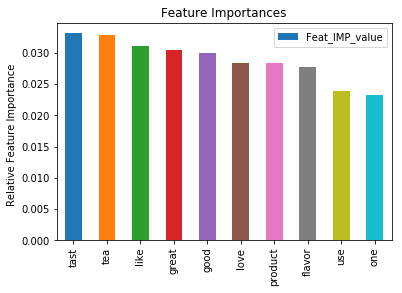

In [24]:
# Important Faeture using TFIDF 
TFIDF_FI(Imp_Feat)

In [25]:
# Co-Occurance Matrix 
df, FINAMES=Co_Occurance_Matrix(X_Text, Imp_Feat)


 Co_Occurance Matrix 


100%|██████████| 40000/40000 [58:56<00:00, 11.31it/s]

(2000, 2000)


MaxExp== 0.9999765409977992


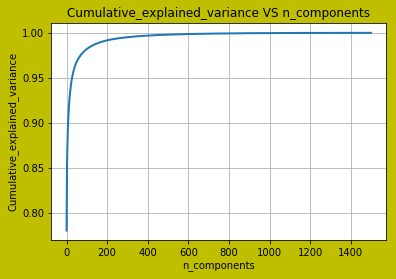

U= (2000, 1500) 
  Sigma= (1500, 1500) 
 VT= (1500, 2000)


In [26]:
# Truncated svd and Plot for Cumulative_explained_variance vs n_componenets
SVD_Truncated(df,[100,500,800,1000,1200,1500])

# Observation

* For Top 2000 features, Only 250 components are giving varience of 99.99%.
* Instead of Using 1500 components, we can use 250 components for further usages. 

MaxExp== 0.9936765211835024


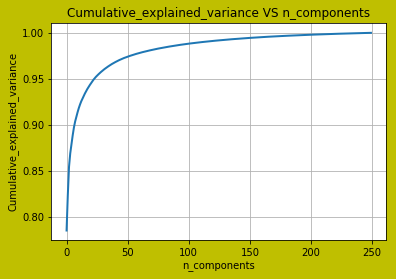

U= (2000, 250) 
  Sigma= (250, 250) 
 VT= (250, 2000)


In [31]:
SVD_Truncated(df,[250,])

In [32]:
(Max_svd.shape[0])

2000

####  cosine_sim_mat is function to get cosine similarity matrix between reviews in truncated matrix. The diagonal line which is shown in below cosine_sim_matrix is 1 as cosine similarity with word & itself is 1.

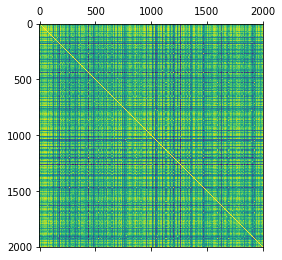

2000


In [33]:
cosine_sim_mat(Max_svd)

#### Graph to get Optimal  Cluster using Elbow Method 

100%|██████████| 18/18 [00:16<00:00,  1.12it/s]


The optimal number of clusters ==  19
The loss for optimal cluster is ==   93652732.96273401


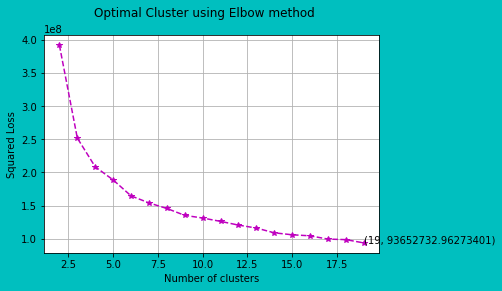

In [34]:
       
Optimal_cluster_kmeans( Max_svd)
           

In [36]:
# Kmeans Clustering using optimal cluster
clusters_KM( Optimal_cluster, mat,FINAMES)

$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


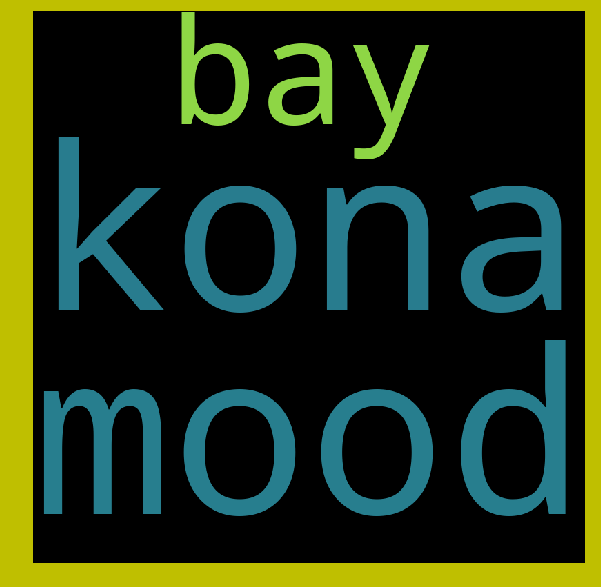

In [37]:

word_cloud_form(clusters[1])

* Cluster =1 conatains above three words.It will signifies about mood on bay

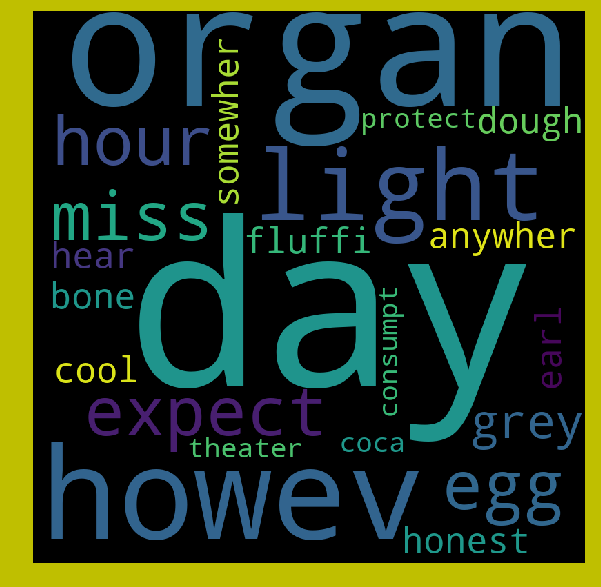

In [38]:
word_cloud_form(clusters[18])

* for Cluster = 18, it is described about light,day ,organ ,food items.

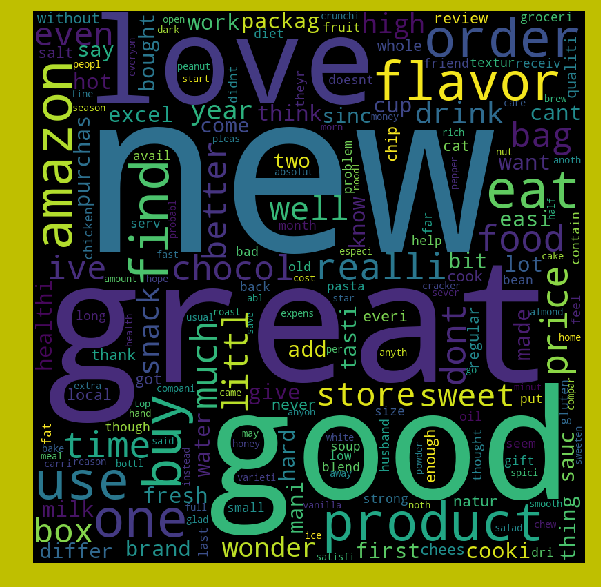

In [39]:
word_cloud_form(clusters[0])

* For cluster=0,all items which are loved one by customers specially great and good reviews.

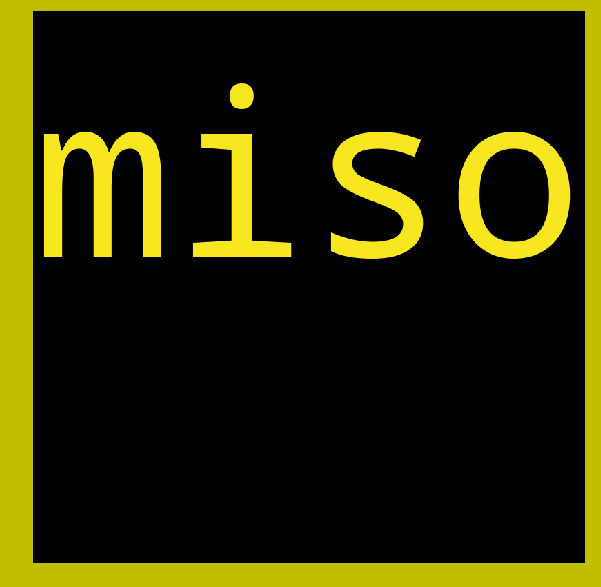

In [40]:
word_cloud_form(clusters[8])

* For cluster=8,only one word is avaliable .

# For Top 5000  features from tf-idf vectorizers

In [23]:
# Top 5000 features
Imp_Feat=5000

|FEATURE|Feat_IMP_value|
|-------|-------------:|
|tast   |       0.03070|
|tea    |       0.03050|
|like   |       0.02860|
|great  |       0.02830|
|good   |       0.02773|
|love   |       0.02630|
|product|       0.02607|
|flavor |       0.02578|
|use    |       0.02184|
|one    |       0.02140|

  FEATURE  Feat_IMP_value
0    tast        0.030698
1     tea        0.030499
2    like        0.028596
3   great        0.028299
4    good        0.027732


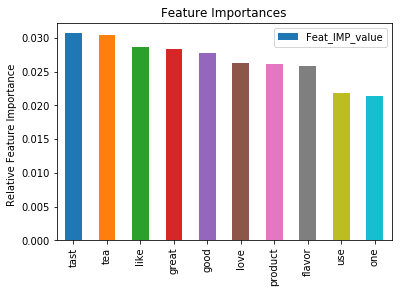

In [24]:
# Important Faeture using TFIDF 
TFIDF_FI(Imp_Feat)

In [25]:
# Co-Occurance Matrix 
df, FINAMES=Co_Occurance_Matrix(X_Text, Imp_Feat)

 Co_Occurance Matrix 


100%|██████████| 40000/40000 [1:03:02<00:00, 10.58it/s]

(5000, 5000)


MaxExp== 0.9999998502125297


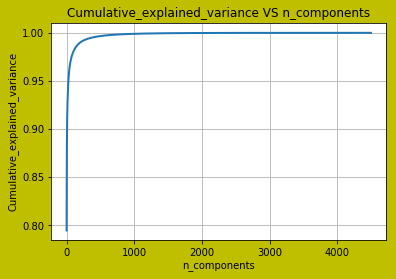

U= (5000, 4500) 
  Sigma= (4500, 4500) 
 VT= (4500, 5000)


In [26]:
# Truncated svd and Plot for Cumulative_explained_variance vs n_componenets
SVD_Truncated(df,[1000,1500,2000,2500,3000,3500,4000,4500])

# Observation

* For Top 5000 features, Only 250 components are giving varience of 99.99%.
* Instead of Using 4500 components, we can use 450 components for further usages. 

MaxExp== 0.9960839887119584


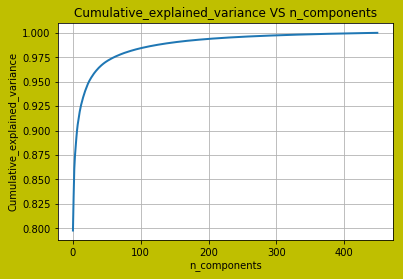

U= (5000, 450) 
  Sigma= (450, 450) 
 VT= (450, 5000)


In [30]:
# Truncated svd and Plot for Cumulative_explained_variance vs n_componenets
SVD_Truncated(df,[450,])

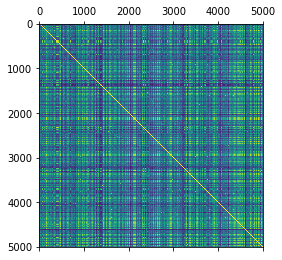

5000


In [31]:
cosine_sim_mat(Max_svd)

100%|██████████| 18/18 [00:47<00:00,  2.64s/it]


The optimal number of clusters ==  19
The loss for optimal cluster is ==   102881584.93735664


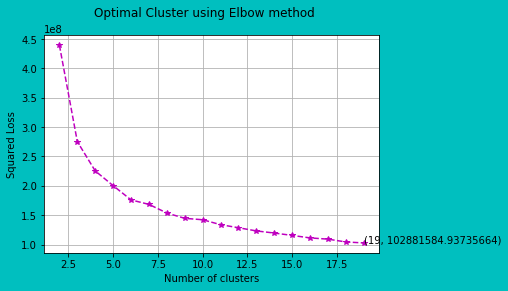

In [32]:
Optimal_cluster_kmeans( Max_svd)

In [33]:
# Kmeans Clustering using optimal cluster
clusters_KM( Optimal_cluster, mat,FINAMES)

$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__$__
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


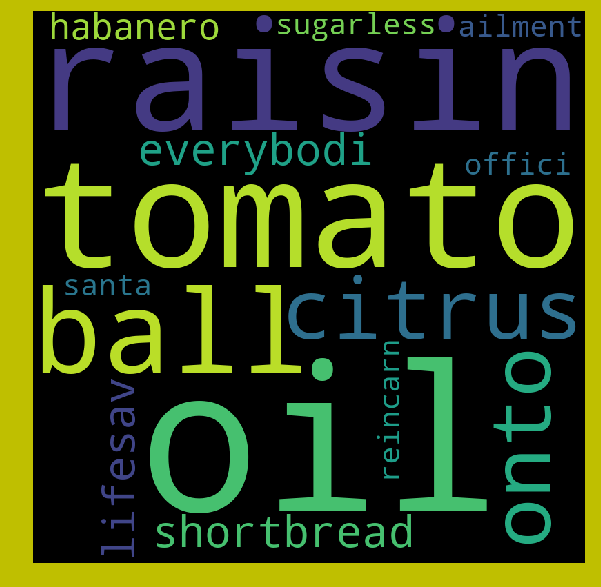

In [34]:
word_cloud_form(clusters[1])

* for cluster=1, high importance features are raisen, tomato and oil.

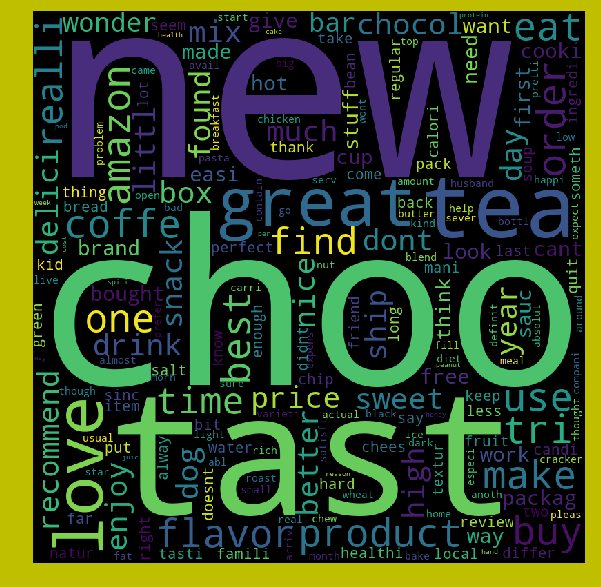

In [35]:
word_cloud_form(clusters[18])

* Cluster=18, it described about taste of tea and review about it

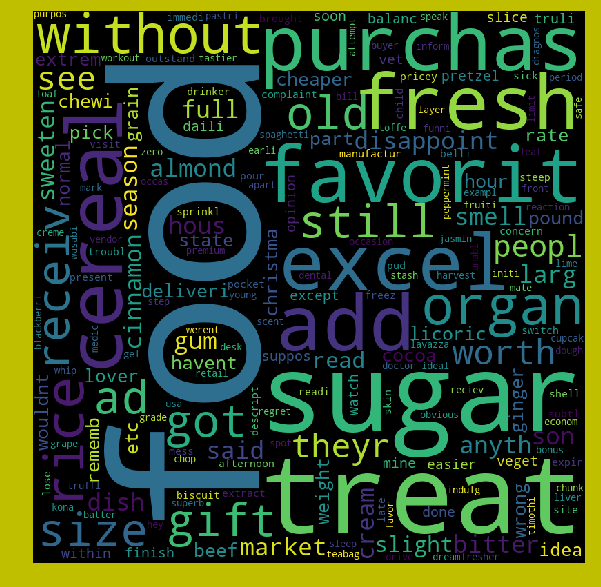

In [36]:
word_cloud_form(clusters[0])

* For cluster=7 ,It is showing reviews which are realted to food items.

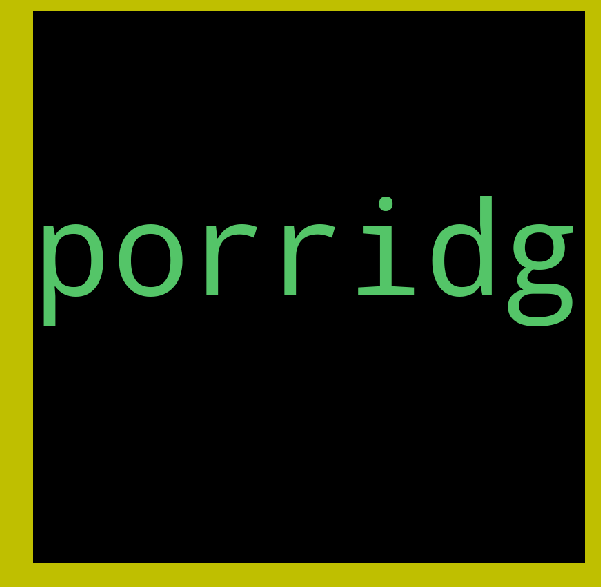

In [37]:
word_cloud_form(clusters[8])

* Cluster =8, conatins only one word which is shown as above.

# Observation 

* After applying Word Vectors using Truncated SVD [M] on amazon food reviews which is  shown into wordcloud format, It is observered that all n_components which is calcualted for particular number of feature is not used .As few n_components is giving us 99.99% varience.
* Some clusters contains only one word.
* Cosine similarity is realting about the closeness of one word with another.
* The required objective is successfully achieved using Word Vectors using Truncated SVD [M]
